## Import Libraries

In [1]:
# read hdf5 file and plot the data
import h5py
import xmltodict
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import plotly.express as px
# raise SystemExit("Stop Point!")

## Load Data

In [2]:
# read the file
datafile_path = "../../data/"
# filename = datafile_path + "eye closed2023.11.29_11.05.35.hdf5"
# filename = datafile_path + "eye open2023.11.29_10.56.28.hdf5"
filename = datafile_path + "eyes closed2024.03.11_12.29.58.hdf5"

def read_hdf5(filename):
    with h5py.File(filename, "r") as FILE:
        # Print all root level object names (aka keys) 
        # these can be group or dataset names 
        print("Keys: %s" % FILE.keys())

        # List all the groups in the file
        print("\nGroups in the HDF5 file:")
        print(list(FILE.keys()))

        # Print all the groups and datasets
        print("\nGroups and datasets in the HDF5 file:")
        for key in FILE.keys():
            print(key, FILE[key])
        # Print al the datasets in the RawData group
        print("\nDatasets in the RawData group:")
        print(list(FILE['RawData'].keys()))

        # Access a specific group
        data_samples = FILE['RawData']['Samples'][:]
        data_task_description = FILE['RawData']['AcquisitionTaskDescription'][:]
        # data_info[0] is a xml format string, convert it to to dictionary using xmltodict
        data_info_dict = xmltodict.parse(data_task_description[0])
        FILE.close()
        return data_samples, data_info_dict

data_samples, data_info_dict = read_hdf5(filename)

Keys: <KeysViewHDF5 ['AsynchronData', 'RawData', 'SavedFeatues', 'Version']>

Groups in the HDF5 file:
['AsynchronData', 'RawData', 'SavedFeatues', 'Version']

Groups and datasets in the HDF5 file:
AsynchronData <HDF5 group "/AsynchronData" (1 members)>
RawData <HDF5 group "/RawData" (7 members)>
SavedFeatues <HDF5 group "/SavedFeatues" (1 members)>
Version <HDF5 group "/Version" (1 members)>

Datasets in the RawData group:
['AcquisitionTaskDescription', 'DAQDeviceCapabilities', 'DAQDeviceDescription', 'ElectrodeMontageDefinition', 'Samples', 'SessionDescription', 'SubjectDescription']


### Acquisition Task Description

In [3]:
data_info_dict

{'AcquisitionTaskDescription': {'@xmlns:xsd': 'http://www.w3.org/2001/XMLSchema',
  '@xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  'RecordingDateBegin': '2024-03-11T16:29:58.945627Z',
  'ChannelProperties': {'ChannelProperties': [{'BipolarPhysicalChannelNumber': '0',
     'SensitivityLowValue': '-2384.835',
     'SensitivityHighValue': '2384.835',
     'SampleRate': '512',
     'Offset': '12378.8652',
     'NotchFilter': '60',
     'HighpassFilter': '0.01',
     'LowpassFilter': '30',
     'IsBipolar': 'false',
     'IsTriggerChannel': 'false',
     'DeviceNumber': '1',
     'DeviceName': 'HA-2021.05.05',
     'LogicalChannelNumber': '1',
     'PhysicalChannelNumber': '1',
     'ChannelType': None,
     'ChannelName': 'FP1',
     'ChannelColoring': {'PenColor': '-16626564', 'PaperColor': '-1'}},
    {'BipolarPhysicalChannelNumber': '0',
     'SensitivityLowValue': '-250000',
     'SensitivityHighValue': '250000',
     'SampleRate': '512',
     'Offset': '0',
     'NotchFi

In [4]:
SampleRate = [rate['SampleRate'] for rate in data_info_dict['AcquisitionTaskDescription']['ChannelProperties']['ChannelProperties']]
# Check if all the data have the same sample rate
if np.all(np.array(SampleRate) == SampleRate[0]):
    print(f"SampleRate is {SampleRate[0]}")
    
np.array(SampleRate)

SampleRate is 512


array(['512', '512', '512', '512', '512', '512', '512', '512', '512',
       '512', '512', '512', '512', '512', '512', '512', '512', '512',
       '512', '512', '512', '512', '512', '512', '512', '512', '512',
       '512', '512', '512', '512', '512', '512', '512', '512', '512',
       '512', '512', '512', '512', '512', '512', '512', '512', '512',
       '512', '512', '512', '512', '512', '512', '512', '512', '512',
       '512', '512', '512', '512', '512', '512', '512', '512', '512',
       '512'], dtype='<U3')

### Get the Channel Names

In [5]:
# data_info_dict is a dictionary, get all the ChannelName from it and convert it to a list, the ChannelName is under the key 'AcquisitionTaskDescription'/'ChannelProperties'/
channel_names = [channel['ChannelName'] for channel in data_info_dict['AcquisitionTaskDescription']['ChannelProperties']['ChannelProperties']]
np.array(channel_names)

array(['FP1', 'FPz', 'FP2', 'AF7', 'AF3', 'AF4', 'AF8', 'F7', 'F5', 'F3',
       'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1',
       'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz',
       'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2',
       'CP4', 'CP6', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4',
       'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2',
       'F9', 'F10', 'A1', 'A2'], dtype='<U3')

In [6]:
data_samples.shape

(92169, 64)

In [7]:
data_samples

array([[   2.5563848 ,    3.1822941 ,    1.2034978 , ...,   -2.9059842 ,
           0.71301997,   -2.5849085 ],
       [  68.73844   ,   89.077194  ,   26.457127  , ...,  -47.23534   ,
          56.808033  ,  -46.849823  ],
       [ 414.78625   ,  537.08344   ,  161.33191   , ..., -246.12265   ,
         371.77872   , -249.87402   ],
       ...,
       [  -7.1533203 ,   -4.6777344 ,  -20.655762  , ...,   17.849121  ,
           8.711914  ,   18.77246   ],
       [  -5.0844727 ,   -2.5048828 ,  -18.467285  , ...,   20.879395  ,
          11.341797  ,   20.711914  ],
       [  -7.845703  ,   -5.036133  ,  -20.8042    , ...,   19.214355  ,
           9.703125  ,   18.05664   ]], dtype=float32)

### Initialize the parameters

In [8]:
# Set the parameters
time_to_remove = 120             # seconds
sampling_rate = 512             # Hz
data_samples = data_samples[sampling_rate*time_to_remove:]  # Remove the first x data points
data_shape = data_samples.shape # (samples, channels)
duration = data_shape[0] / 512  # seconds
channels = data_shape[1]        # channelss
num_samples = data_shape[0]     # samples
print(f"Data shape: {data_shape}, Sampling rate: {sampling_rate} Hz, Duration: {duration} seconds, Channels: {channels}")

# Generate time array
time = np.arange(0, duration, 1 / sampling_rate)

# Create a pandas DataFrame from the data
raw_data_df = pd.DataFrame(data_samples, columns=channel_names)
raw_data_df['Time'] = time
raw_data_df.head()

Data shape: (30729, 64), Sampling rate: 512 Hz, Duration: 60.017578125 seconds, Channels: 64


FP1       FPz        FP2        AF7        AF3        AF4        AF8  \
0  16.895508  4.398438  12.105469  26.499023  14.242188  45.582031  34.969727   
1  19.343750  7.138672  14.791016  28.226562  16.769531  47.085938  37.747070   
2  16.427734  4.681641  12.430664  24.682617  14.019531  43.367188  35.781250   
3  17.918945  6.751953  14.767578  26.036133  15.906250  44.328125  38.815430   
4  17.529297  6.839844  15.298828  26.127930  16.034668  43.589844  40.138672   

          F7         F5         F3  ...        PO4        PO8         O1  \
0  16.023438  27.306030  17.865234  ...  35.251953  41.846680  74.596680   
1  18.558594  30.490845  20.404053  ...  38.187500  45.277344  73.632812   
2  16.013672  28.453613  17.629639  ...  35.951172  43.272461  72.418701   
3  18.371094  30.988770  19.465088  ...  37.689453  45.490234  71.245850   
4  19.146484  31.702759  19.540283  ...  37.699219  45.563477  70.156982   

          Oz          O2         F9       F10         A1         A2      Time  
0  1734.8125 -507.695312  47.699219 -3.133057  14.050781  10.793945  0.000000  
1  1722.1875 -509.733398  50.937500 -0.225342  17.947266  12.993164  0.001953  
2  1709.3125 -512.032227  48.715820 -2.469971  16.117188   9.476562  0.003906  
3  1696.7500 -514.216797  50.955078 -0.160645  18.542969  10.399414  0.005859  
4  1684.8125 -516.186523  51.479492  0.288818  18.955078   9.737305  0.007812  

[5 rows x 65 columns]

## Pass the dataframes to MNE

In [9]:
# Change the data units from microvolts to volts
data_samples = np.divide(data_samples,1e6)

# Pass the dataframes to MNE
info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types='eeg')
raw_data = mne.io.RawArray(data_samples.T, info)


Creating RawArray with float64 data, n_channels=64, n_times=30729
    Range : 0 ... 30728 =      0.000 ...    60.016 secs
Ready.


## Plotting Functions

In [10]:
# Plot using plotly express
def plot_Plotly_Express(data_df, title, labels):
    fig = px.line(
        data_df, 
        x='Time', 
        y=data_df.columns, 
        title=title,
        labels=labels)
    fig.show()
    # fig.write_html(f"{title}.html")

# Plot using PyPlot
def plot_PyPlot(data_df, title, x_label, y_label):
    plt.figure(figsize=(16, 6))
    plt.plot(data_df['Time'], data_df.drop(columns=['Time']))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(data_df.columns, loc="best", prop={'size': 8})
    plt.show()

## Plot Raw EEG Data

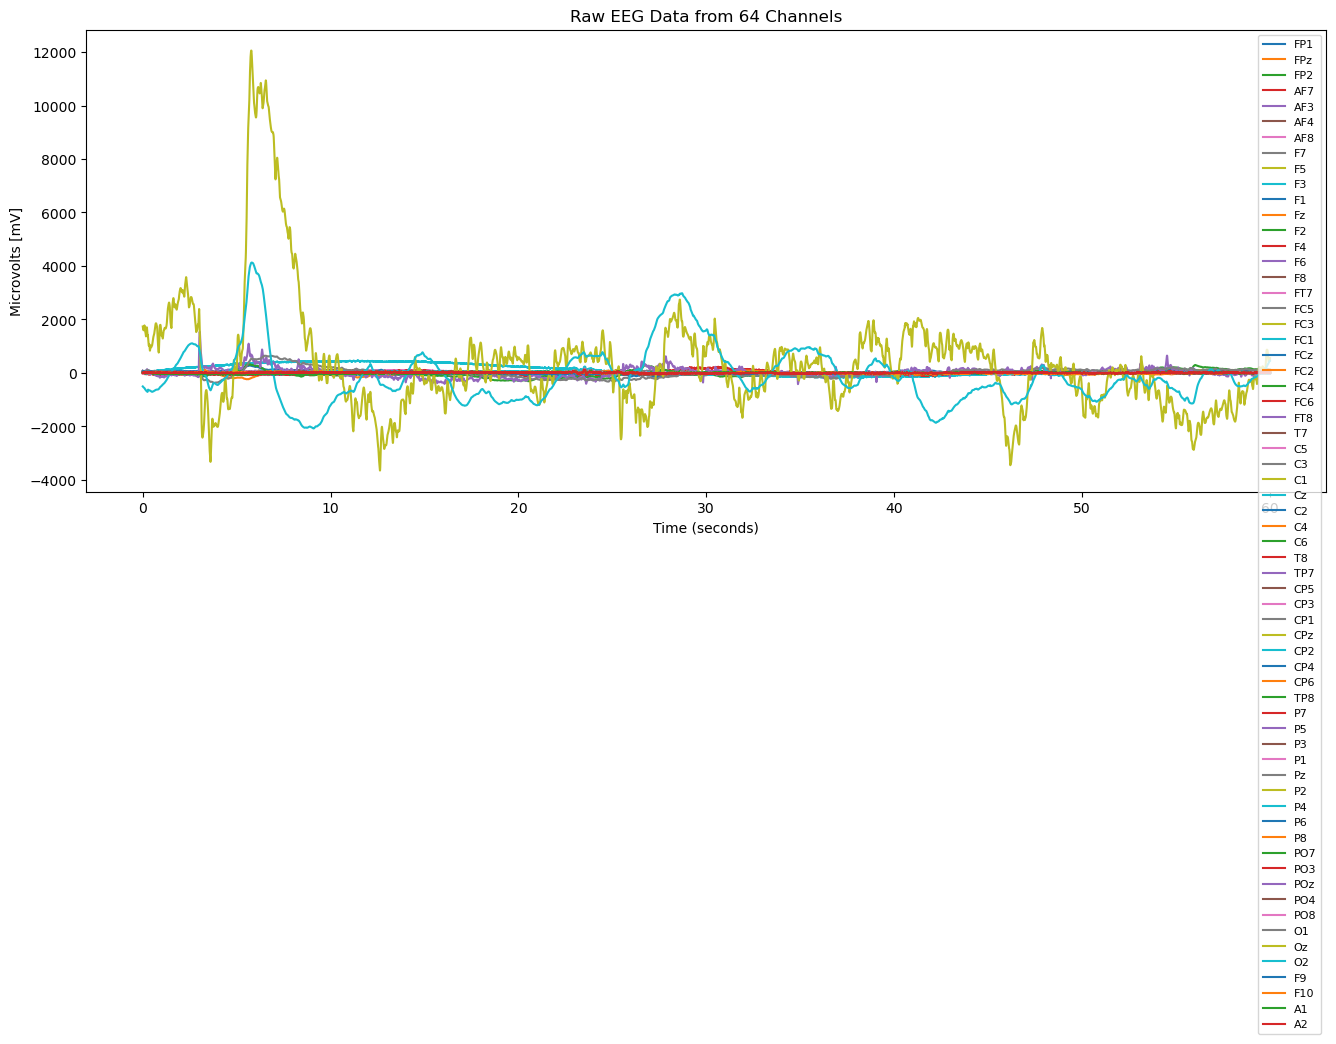

In [11]:
# Set the start and end time for the plot
raw_data_plot = raw_data_df[(raw_data_df['Time']>=0) & (raw_data_df['Time']<=360)]
# Plot raw EEG data using plotly express
# plot_Plotly_Express(raw_data_plot, f'Raw EEG Data from {channels} Channels', {'Time': 'Time (seconds)', 'value': 'Microvolts [mV]'})
# Plot raw EEG data using pyplot
plot_PyPlot(raw_data_plot, f'Raw EEG Data from {channels} Channels', 'Time (seconds)', 'Microvolts [mV]')

In [12]:
raw_data_df

FP1       FPz        FP2        AF7        AF3        AF4  \
0      16.895508  4.398438  12.105469  26.499023  14.242188  45.582031   
1      19.343750  7.138672  14.791016  28.226562  16.769531  47.085938   
2      16.427734  4.681641  12.430664  24.682617  14.019531  43.367188   
3      17.918945  6.751953  14.767578  26.036133  15.906250  44.328125   
4      17.529297  6.839844  15.298828  26.127930  16.034668  43.589844   
...          ...       ...        ...        ...        ...        ...   
30724  -4.698242 -2.100586 -17.947754  20.985596  -0.174561  13.966797   
30725  -8.475098 -6.029297 -21.964844  18.084473  -4.134766  10.070312   
30726  -7.153320 -4.677734 -20.655762  20.341553  -2.635986  10.751953   
30727  -5.084473 -2.504883 -18.467285  23.175537  -0.160645  11.779297   
30728  -7.845703 -5.036133 -20.804199  20.702148  -2.395508   8.025391   

             AF8         F7         F5         F3  ...        PO4        PO8  \
0      34.969727  16.023438  27.306030  17.865234  ...  35.251953  41.846680   
1      37.747070  18.558594  30.490845  20.404053  ...  38.187500  45.277344   
2      35.781250  16.013672  28.453613  17.629639  ...  35.951172  43.272461   
3      38.815430  18.371094  30.988770  19.465088  ...  37.689453  45.490234   
4      40.138672  19.146484  31.702759  19.540283  ...  37.699219  45.563477   
...          ...        ...        ...        ...  ...        ...        ...   
30724  27.526855  -4.741699   1.024170  -0.220955  ...  15.990234  34.707031   
30725  23.101196  -7.129883  -1.960693  -3.827671  ...  14.181641  33.485352   
30726  23.435303  -3.770020   0.914795  -1.838821  ...  16.968750  37.215820   
30727  24.372925   0.641602   5.016113   1.143143  ...  20.464844  41.172852   
30728  20.846069  -0.158691   4.306641  -0.746643  ...  19.050781  39.607422   

               O1          Oz          O2         F9        F10         A1  \
0       74.596680  1734.81250 -507.695312  47.699219  -3.133057  14.050781   
1       73.632812  1722.18750 -509.733398  50.937500  -0.225342  17.947266   
2       72.418701  1709.31250 -512.032227  48.715820  -2.469971  16.117188   
3       71.245850  1696.75000 -514.216797  50.955078  -0.160645  18.542969   
4       70.156982  1684.81250 -516.186523  51.479492   0.288818  18.955078   
...           ...         ...         ...        ...        ...        ...   
30724  105.916016   512.28125  458.562500   9.734009  20.074219  11.790039   
30725  105.528320   521.25000  460.265625   6.065796  15.933594   7.410156   
30726  105.081055   531.25000  461.375000   7.810547  17.849121   8.711914   
30727  104.690430   542.09375  461.781250  10.661377  20.879395  11.341797   
30728  104.208008   553.18750  461.265625   9.067871  19.214355   9.703125   

              A2       Time  
0      10.793945   0.000000  
1      12.993164   0.001953  
2       9.476562   0.003906  
3      10.399414   0.005859  
4       9.737305   0.007812  
...          ...        ...  
30724  22.178711  60.007812  
30725  17.755859  60.009766  
30726  18.772461  60.011719  
30727  20.711914  60.013672  
30728  18.056641  60.015625  

[30729 rows x 65 columns]

## Manually Remove the Channels

In [13]:
# Remove channels from the data 
def remove_channels(data_samples, raw_data_df, channels, channel_names, channels_to_remove):
    # Get the index of the channels to remove
    channels_to_remove_index = [channel_names.index(channel) for channel in channels_to_remove]
    # Remove the channels from the data_samples
    data_samples = np.delete(data_samples, channels_to_remove_index, axis=1)
    # Remove the channels from the pandas raw_data for plotting
    raw_data_df = raw_data_df.drop(columns=channels_to_remove)
    # Remove the channels from the channel_names
    channel_names = [channel for channel in channel_names if channel not in channels_to_remove]
    # Change the number of channels
    channels = len(channel_names)
    return data_samples, raw_data_df, channels, channel_names

### Remove channel test

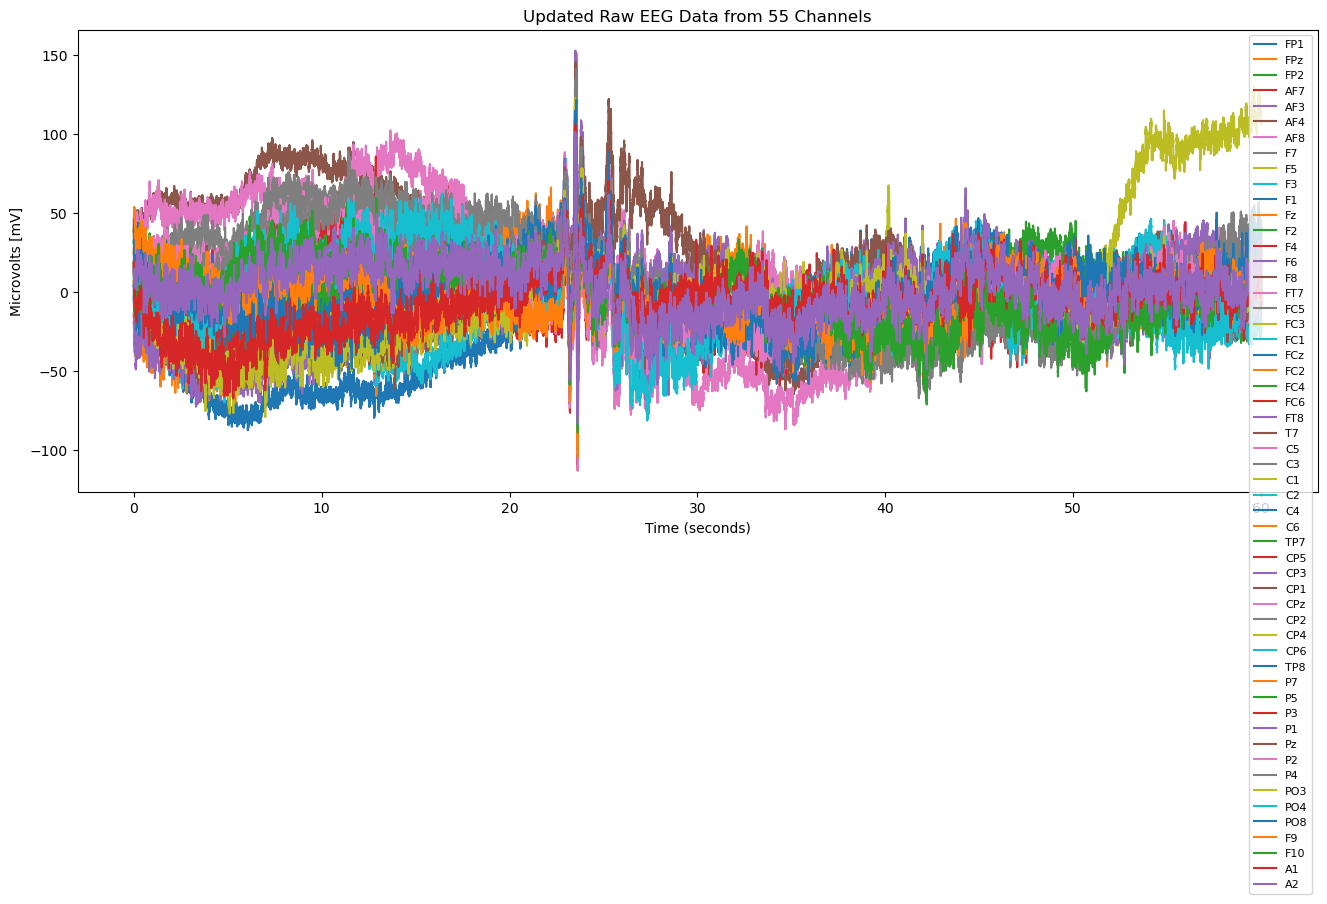

(30729, 64)


FP1       FPz        FP2        AF7        AF3        AF4  \
0      16.895508  4.398438  12.105469  26.499023  14.242188  45.582031   
1      19.343750  7.138672  14.791016  28.226562  16.769531  47.085938   
2      16.427734  4.681641  12.430664  24.682617  14.019531  43.367188   
3      17.918945  6.751953  14.767578  26.036133  15.906250  44.328125   
4      17.529297  6.839844  15.298828  26.127930  16.034668  43.589844   
...          ...       ...        ...        ...        ...        ...   
30724  -4.698242 -2.100586 -17.947754  20.985596  -0.174561  13.966797   
30725  -8.475098 -6.029297 -21.964844  18.084473  -4.134766  10.070312   
30726  -7.153320 -4.677734 -20.655762  20.341553  -2.635986  10.751953   
30727  -5.084473 -2.504883 -18.467285  23.175537  -0.160645  11.779297   
30728  -7.845703 -5.036133 -20.804199  20.702148  -2.395508   8.025391   

             AF8         F7         F5         F3  ...         P2         P4  \
0      34.969727  16.023438  27.306030  17.865234  ...  43.669434  13.972656   
1      37.747070  18.558594  30.490845  20.404053  ...  45.556641  15.947266   
2      35.781250  16.013672  28.453613  17.629639  ...  42.265137  12.583984   
3      38.815430  18.371094  30.988770  19.465088  ...  43.605469  13.835938   
4      40.138672  19.146484  31.702759  19.540283  ...  43.279297  13.443359   
...          ...        ...        ...        ...  ...        ...        ...   
30724  27.526855  -4.741699   1.024170  -0.220955  ...   6.018066  32.948242   
30725  23.101196  -7.129883  -1.960693  -3.827671  ...   3.119629  30.054199   
30726  23.435303  -3.770020   0.914795  -1.838821  ...   5.527832  32.313477   
30727  24.372925   0.641602   5.016113   1.143143  ...   8.788574  35.197266   
30728  20.846069  -0.158691   4.306641  -0.746643  ...   7.145508  33.002441   

             PO3        PO4        PO8         F9        F10         A1  \
0      23.781250  35.251953  41.846680  47.699219  -3.133057  14.050781   
1      26.419922  38.187500  45.277344  50.937500  -0.225342  17.947266   
2      23.527344  35.951172  43.272461  48.715820  -2.469971  16.117188   
3      24.951172  37.689453  45.490234  50.955078  -0.160645  18.542969   
4      24.273438  37.699219  45.563477  51.479492   0.288818  18.955078   
...          ...        ...        ...        ...        ...        ...   
30724   1.122559  15.990234  34.707031   9.734009  20.074219  11.790039   
30725  -1.394531  14.181641  33.485352   6.065796  15.933594   7.410156   
30726   1.753906  16.968750  37.215820   7.810547  17.849121   8.711914   
30727   5.990723  20.464844  41.172852  10.661377  20.879395  11.341797   
30728   5.670898  19.050781  39.607422   9.067871  19.214355   9.703125   

              A2       Time  
0      10.793945   0.000000  
1      12.993164   0.001953  
2       9.476562   0.003906  
3      10.399414   0.005859  
4       9.737305   0.007812  
...          ...        ...  
30724  22.178711  60.007812  
30725  17.755859  60.009766  
30726  18.772461  60.011719  
30727  20.711914  60.013672  
30728  18.056641  60.015625  

[30729 rows x 56 columns]

In [14]:
# Channels to remove
channels_to_remove = ['Cz', 'O1', 'O2', 'Oz', 'PO7', 'POz', 'P6', 'P8', 'T8']
# Remove the channels
data_samples_r, raw_data_df_r, channels_r, channel_names_r = \
    remove_channels(data_samples, raw_data_df, channels, channel_names, channels_to_remove)

# Set the start and end time for the plot
raw_data_plot_r = raw_data_df_r[(raw_data_df_r['Time']>=0) & (raw_data_df_r['Time']<=360)]
# Plot raw EEG data using plotly express
# plot_Plotly_Express(raw_data_plot_r, f'Raw EEG Data from {channels_r} Channels', {'Time': 'Time (seconds)', 'value': 'Microvolts [mV]'})
# Plot raw EEG data using pyplot
plot_PyPlot(raw_data_plot_r, f'Updated Raw EEG Data from {channels_r} Channels', 'Time (seconds)', 'Microvolts [mV]')

print(data_samples.shape)
raw_data_df_r

In [15]:
# raise SystemExit("Stop Point!")

### Remove and Update the Channels

Creating RawArray with float64 data, n_channels=55, n_times=30729
    Range : 0 ... 30728 =      0.000 ...    60.016 secs
Ready.


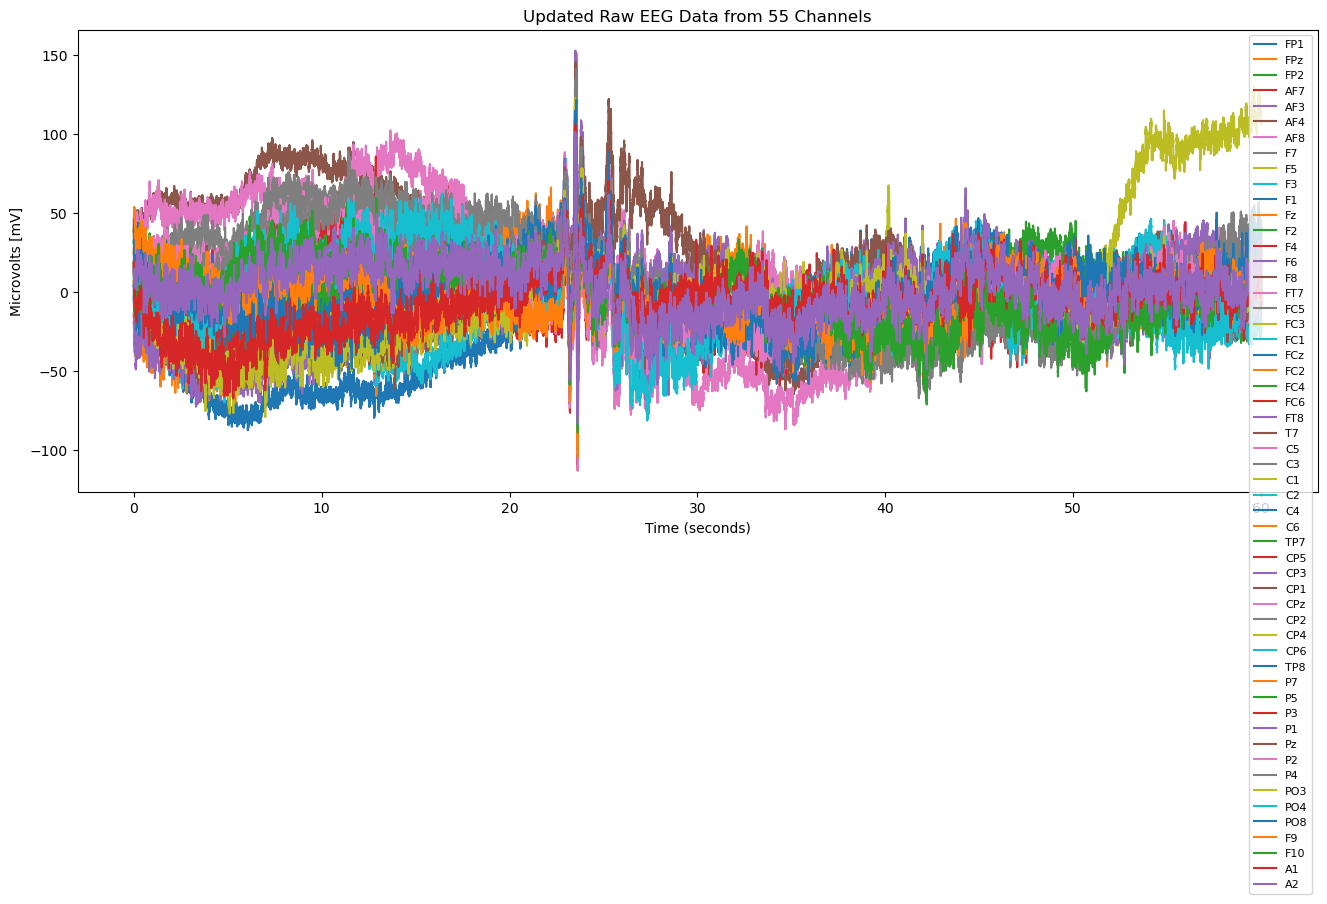

In [16]:
# Channels to remove
channels_to_remove = ['Cz', 'O1', 'O2', 'Oz', 'PO7', 'POz', 'P6', 'P8', 'T8']
# Remove the channels
data_samples, raw_data_df, channels, channel_names = \
    remove_channels(data_samples, raw_data_df, channels, channel_names, channels_to_remove)

# Pass the updated dataframes to MNE
info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types='eeg')
raw_data = mne.io.RawArray(data_samples.T, info)

# Set the start and end time for the plot
raw_data_plot = raw_data_df[(raw_data_df['Time']>=0) & (raw_data_df['Time']<=360)]
# Plot raw EEG data using plotly express
# plot_Plotly_Express(raw_data_plot, f'Raw EEG Data from {channels} Channels', {'Time': 'Time (seconds)', 'value': 'Microvolts [mV]'})
# Plot raw EEG data using pyplot
plot_PyPlot(raw_data_plot, f'Updated Raw EEG Data from {channels} Channels', 'Time (seconds)', 'Microvolts [mV]')

In [17]:
raw_data

<RawArray | 55 x 30729 (60.0 s), ~12.9 MB, data loaded>

## Apply Re-referencing

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


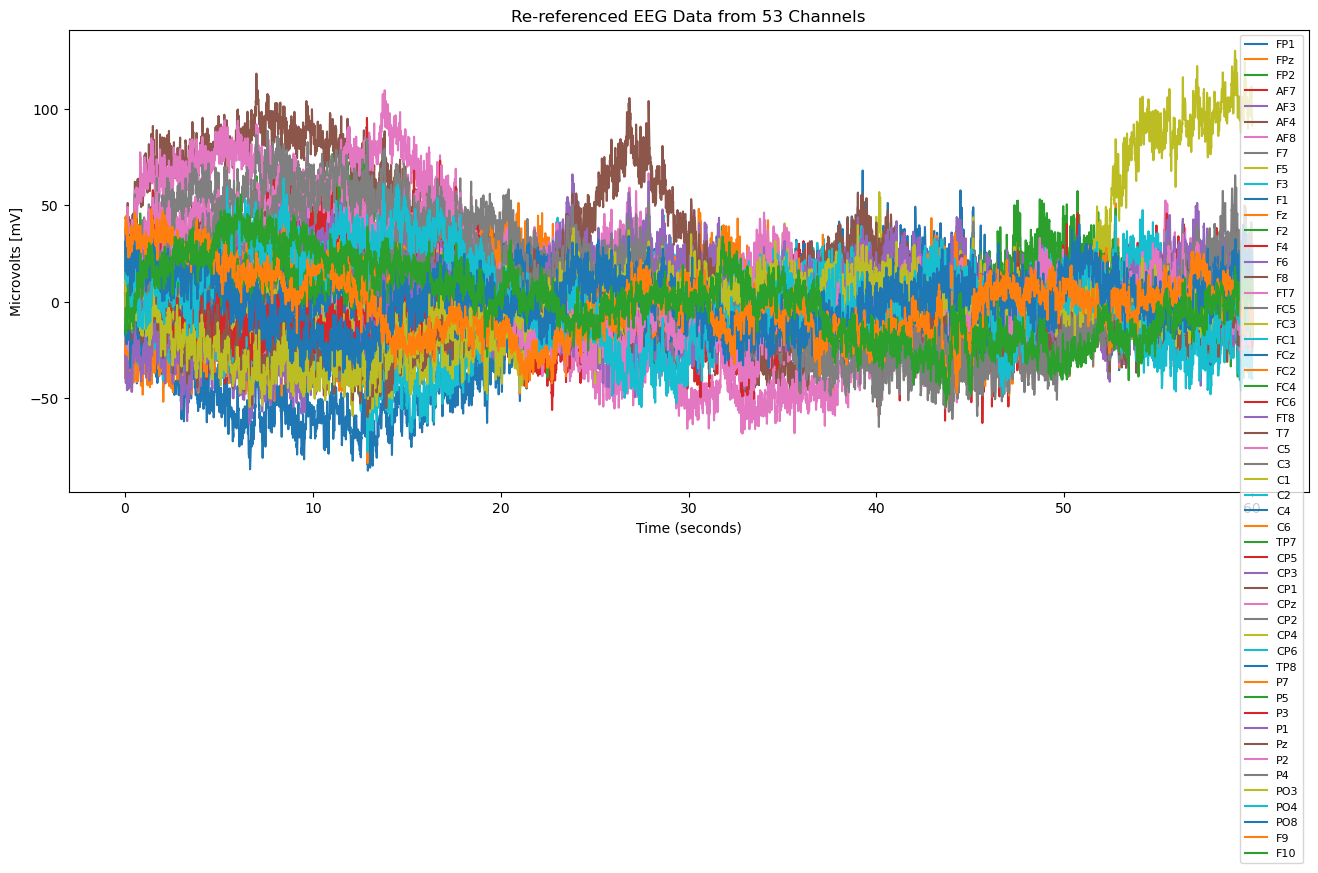

In [18]:
# Apply re-referencing to the data, using some channels as reference
reference_channels = ['A1', 'A2']
raw_data.set_eeg_reference(ref_channels=reference_channels)
raw_data_df_ref = pd.DataFrame(raw_data.get_data().T, columns=channel_names)
# Scale the data to microvolts (times 1e6)
raw_data_df_ref = raw_data_df_ref * 1e6
raw_data_df_ref['Time'] = time

# Drop the reference channels from the dataframe
raw_data_df_ref = raw_data_df_ref.drop(columns=reference_channels)
channels = channels - len(reference_channels)

# Set the start and end time for the plot
raw_data_df_ref_plot = raw_data_df_ref[(raw_data_df_ref['Time']>=0) & (raw_data_df_ref['Time']<=360)]

# Plot re-referenced EEG data using plotly express
# plot_Plotly_Express(raw_data_df_ref_plot, f'Re-referenced EEG Data from {channels} Channels', {'Time': 'Time (seconds)', 'value': 'Microvolts [mV]'})
# Plot re-referenced EEG data using pyplot
plot_PyPlot(raw_data_df_ref_plot, f'Re-referenced EEG Data from {channels} Channels', 'Time (seconds)', 'Microvolts [mV]')

## Apply Band-pass Filter

In [19]:
# Apply a bandpass filter to the data using MNE
band_filtered_eeg = raw_data.filter(l_freq=0.1, h_freq=30, fir_design="firwin")
band_data = band_filtered_eeg.get_data()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16897 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


## Plot Band-pass Filtered Data

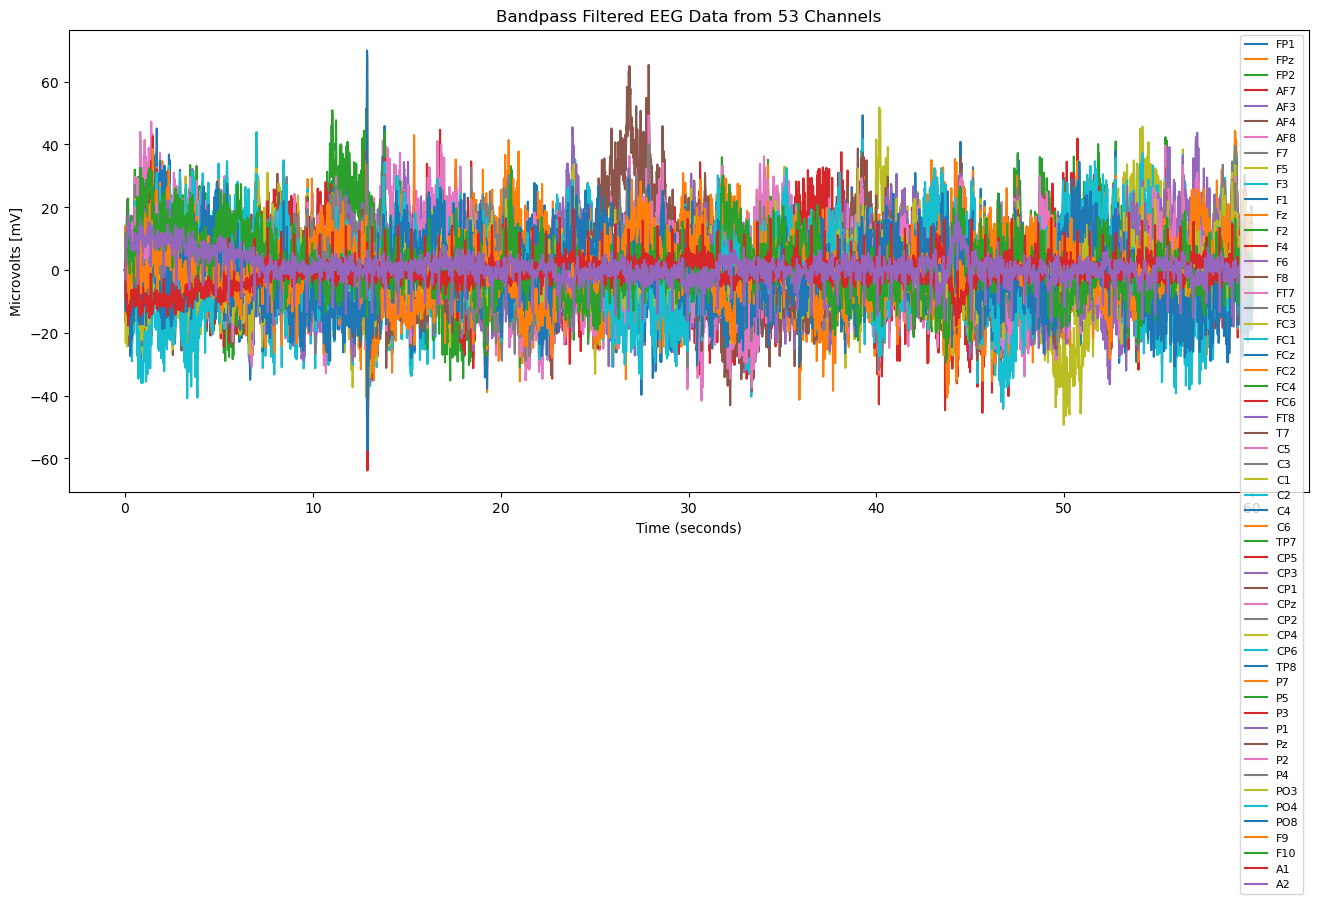

In [20]:
# Create a pandas DataFrame from the bandpass filtered data
band_data_df = pd.DataFrame(band_data.T, columns=channel_names)
band_data_df = band_data_df * 1e6
band_data_df['Time'] = band_filtered_eeg.times
# Set the start and end time for the plot
band_data_df_plot = band_data_df[(band_data_df['Time']>=0) & (band_data_df['Time']<=360)]
# Plot the filtered EEG data using plotly express
# plot_Plotly_Express(band_data_df_plot, f'Bandpass Filtered EEG Data from {channels} Channels', {'Time': 'Time (seconds)', 'value': 'Microvolts [mV]'})
# Plot the bandpass filtered EEG data using pyplot
plot_PyPlot(band_data_df_plot, f'Bandpass Filtered EEG Data from {channels} Channels', 'Time (seconds)', 'Microvolts [mV]')

## Apply Notch Filter

In [21]:
# Apply notch filter to the data using MNE
notch_filtered_eeg = band_filtered_eeg.notch_filter(freqs=60)
notch_data = notch_filtered_eeg.get_data()

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


## Plot Notch Filtered Data

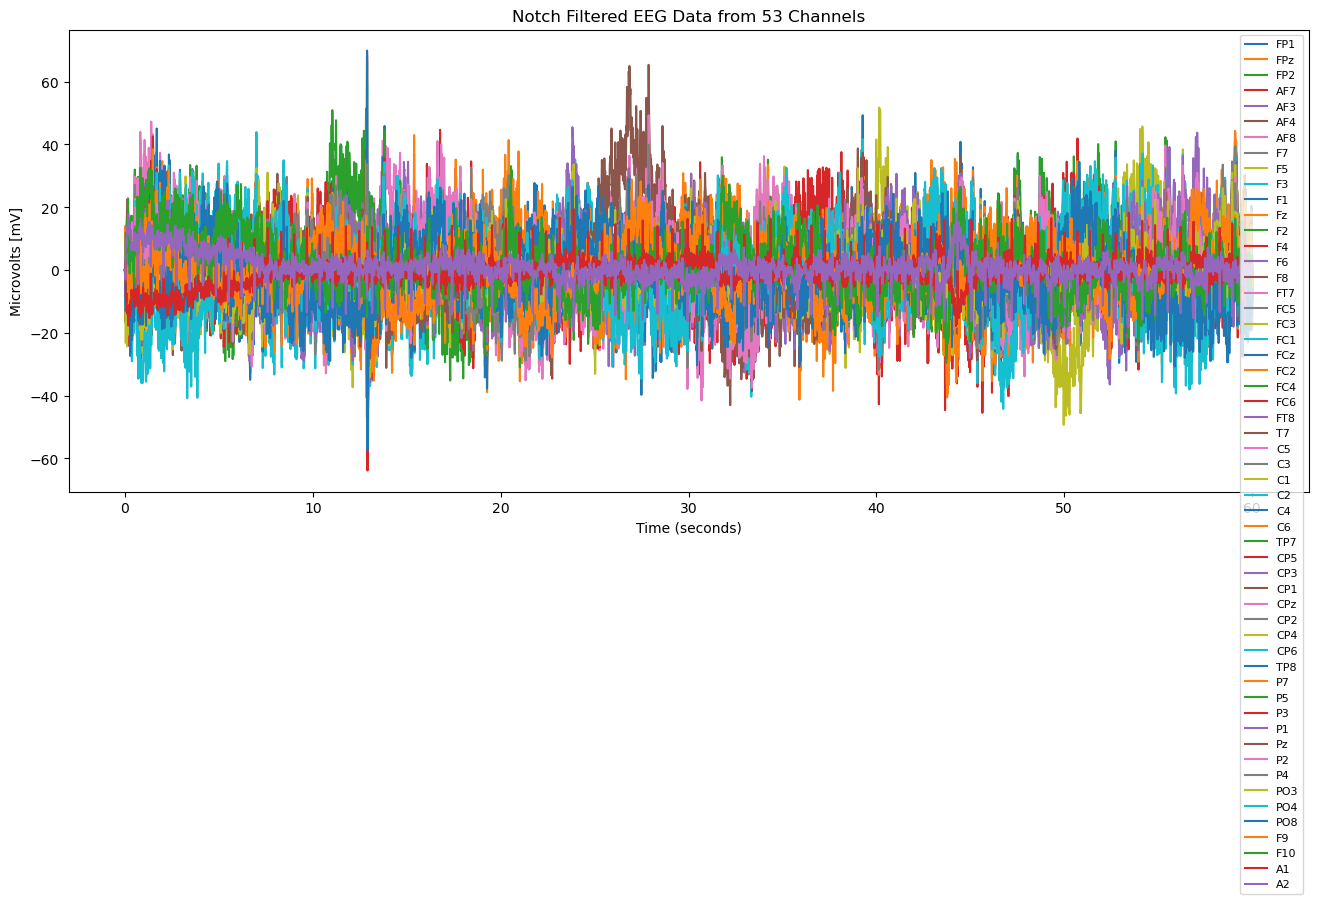

In [22]:
# Format the notch filtered data into a pandas DataFrame
notch_data_df = pd.DataFrame(notch_data.T, columns=channel_names)
notch_data_df = notch_data_df * 1e6
notch_data_df['Time'] = notch_filtered_eeg.times

# Plot the notch filtered EEG data using plotly express
# plot_Plotly_Express(notch_data_df, 0, 120, f'Notch Filtered EEG Data from {channels} Channels', {'Time': 'Time (seconds)', 'value': 'Microvolts [mV]'})

# Plot the notch filtered EEG data using pyplot
plot_PyPlot(notch_data_df, f'Notch Filtered EEG Data from {channels} Channels', 'Time (seconds)', 'Microvolts [mV]')

## Independent Component Analysis (ICA)

In [44]:
# Apply ICA to the data using MNE https://mne.tools/stable/generated/mne.preprocessing.ICA.html 
ica = mne.preprocessing.ICA(n_components=channels, random_state=97, max_iter="auto")
ica.fit(notch_filtered_eeg)
ica.plot_sources(notch_filtered_eeg, show_scrollbars=False, start=0, stop=num_samples)

Fitting ICA to data using 55 channels (please be patient, this may take a while)
Selecting by number: 53 components
Fitting ICA took 3.7s.
Creating RawArray with float64 data, n_channels=53, n_times=30729
    Range : 0 ... 30728 =      0.000 ...    60.016 secs
Ready.


C:\Users\aiden\AppData\Local\Temp\ipykernel_7492\3399499722.py:3: RuntimeWarning: Using n_components=53 (resulting in n_components_=53) may lead to an unstable mixing matrix estimation because the ratio between the largest (25) and smallest (4.4e-31) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 52
  ica.fit(notch_filtered_eeg)


In [24]:
ica

<ICA | raw data decomposition, method: fastica (fit in 63 iterations on 30729 samples), 53 ICA components (55 PCA components available), channel types: eeg, no sources marked for exclusion>

## Remove the EOG artifacts

In [25]:
# # Remove the EOG artifacts from the data using MNE
# eog_indices, eog_scores = ica.find_bads_eog(notch_filtered_eeg)
# ica.plot_scores(eog_scores)
# # No EOG channel(s) found

## Remove Artifact

Applying ICA to Raw instance
    Transforming to ICA space (53 components)
    Zeroing out 2 ICA components
    Projecting back using 55 PCA components


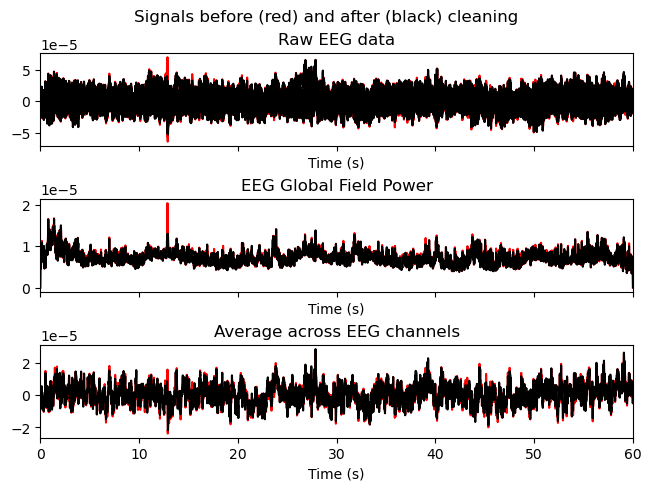

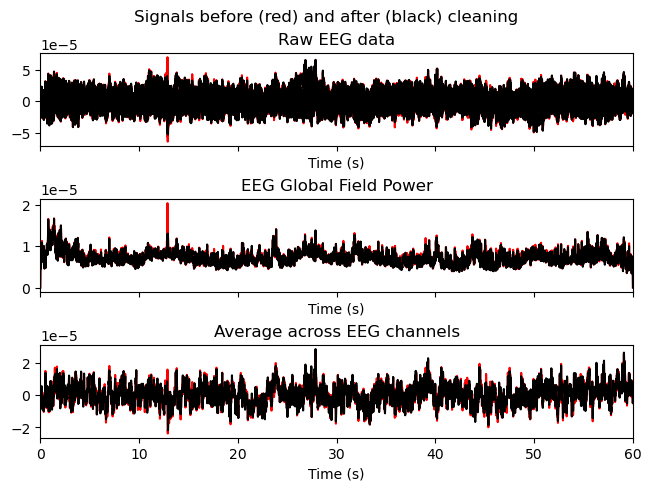

In [41]:
# blinks
exclude = [10, 24]
ica.plot_overlay(notch_filtered_eeg, exclude=exclude, picks="eeg", start=0, stop=num_samples)

In [42]:
# Get Data that removed the specified components from the data using MNE
ica.exclude = exclude
cleaned_eeg = ica.apply(notch_filtered_eeg)
cleaned_eeg

Applying ICA to Raw instance
    Transforming to ICA space (53 components)
    Zeroing out 2 ICA components
    Projecting back using 55 PCA components


<RawArray | 55 x 30729 (60.0 s), ~12.9 MB, data loaded>

## Plot the cleaned EEG data

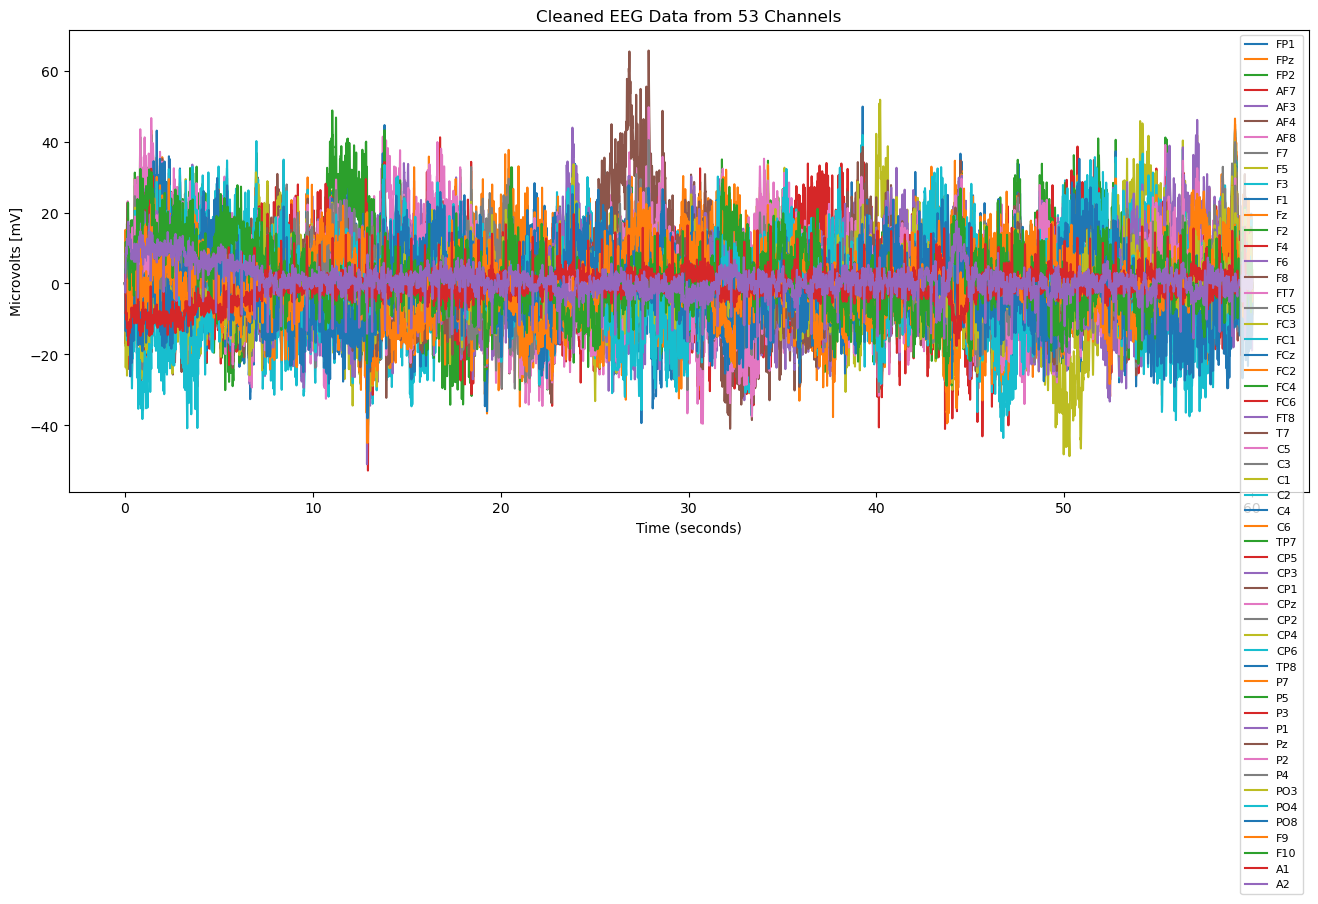

In [43]:
# Format the cleaned data into a pandas DataFrame
cleaned_data = cleaned_eeg.get_data()
cleaned_data_df = pd.DataFrame(cleaned_data.T, columns=channel_names)
cleaned_data_df = cleaned_data_df * 1e6
cleaned_data_df['Time'] = cleaned_eeg.times 

# Plot the cleaned EEG data using plotly express
# plot_Plotly_Express(cleaned_data_df, f'Cleaned EEG Data from {channels} Channels', {'Time': 'Time (seconds)', 'value': 'Microvolts [mV]'})

# Plot the cleaned EEG data using pyplot
plot_PyPlot(cleaned_data_df, f'Cleaned EEG Data from {channels} Channels', 'Time (seconds)', 'Microvolts [mV]')

In [29]:
cleaned_data.shape

(55, 30729)

## Power Spectual Density

In [49]:
# Calculate the Power Spectral Density (PSD) of the cleaned EEG data 
# using MNE's mne.io.RawArray.compute_psd() method
# Two methods are used: Welch and Multitaper
welch_psd = cleaned_eeg.compute_psd(method='welch', fmin=0, fmax=30, n_fft=int(20*sampling_rate))
multitaper_psd = cleaned_eeg.compute_psd(method='multitaper', fmin=0, fmax=30)
welch_psd_df = welch_psd.to_data_frame(copy=True)
# scale welch_psd_df to 1e12 for all columns except 'freq'
welch_psd_df.iloc[:, 1:] = welch_psd_df.iloc[:, 1:] * 1e12
welch_psd

Effective window size : 20.000 (s)
    Using multitaper spectrum estimation with 7 DPSS windows


<Power Spectrum (from Raw, welch method) | 55 channels × 601 freqs, 0.0-30.0 Hz>

## Define Plotting Functions

In [50]:
# Plot the frequence band data from welch PSD using plotly express
def plot_Plotly_Express_PSD(data_df, title, labels):
    fig = px.line(
        data_df, 
        x='freq', 
        y=data_df.columns[1:], 
        title=title,
        labels=labels)
    fig.show()

# Plot the frequence band data from welch PSD using pyplot
def plot_PyPlot_PSD(data_df, title, x_label, y_label):
    plt.figure(figsize=(16, 6))
    plt.plot(data_df['freq'], data_df.iloc[:,1:])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(data_df.columns[1:], loc="best", prop={'size': 8})
    plt.show()

# Initialize data with each frequency band
delta_band = welch_psd_df[(welch_psd_df['freq']>=0.5) & (welch_psd_df['freq']<4)]
theta_band = welch_psd_df[(welch_psd_df['freq']>=4) & (welch_psd_df['freq']<8)]
alpha_band = welch_psd_df[(welch_psd_df['freq']>=8) & (welch_psd_df['freq']<12)]
beta_band = welch_psd_df[(welch_psd_df['freq']>=12) & (welch_psd_df['freq']<30)]
low_beta_band = welch_psd_df[(welch_psd_df['freq']>=12) & (welch_psd_df['freq']<20)]
high_beta_band = welch_psd_df[(welch_psd_df['freq']>=20) & (welch_psd_df['freq']<30)]
gamma_band = welch_psd_df[(welch_psd_df['freq']>=30) & (welch_psd_df['freq']<=120)]
overall_band = welch_psd_df[(welch_psd_df['freq']>=0) & (welch_psd_df['freq']<=120)]

# Save the data to a pandas matrix, with each column representing a average frequency band, and each row representing a channel
welch_psd_matrix = np.array([delta_band.mean().values[1:], theta_band.mean().values[1:], alpha_band.mean().values[1:], beta_band.mean().values[1:], low_beta_band.mean().values[1:], high_beta_band.mean().values[1:]])
welch_psd_matrix_df = pd.DataFrame(welch_psd_matrix.T, index=welch_psd_df.columns[1:], columns=['Delta', 'Theta', 'Alpha', 'Beta', 'Low Beta', 'High Beta'])

welch_psd_matrix_df

Delta     Theta     Alpha      Beta  Low Beta  High Beta
FP1   6.519620  1.674462  0.844504  0.522884  0.797546   0.303155
FPz   6.139946  1.601609  0.798914  0.382945  0.663081   0.158835
FP2   7.197804  1.613289  0.827512  0.442305  0.694679   0.240406
AF7   6.421009  1.828897  0.939914  0.522580  0.830522   0.276225
AF3   5.491140  2.352246  1.114074  0.490530  0.829611   0.219265
AF4   6.503551  2.598954  1.181792  0.556283  0.938514   0.250499
AF8   6.358011  1.678569  0.718788  0.453890  0.721497   0.239805
F7    4.157526  1.736804  0.760252  0.413623  0.647299   0.226682
F5    5.049722  2.300250  1.102317  0.508778  0.806460   0.270632
F3    6.538044  3.057504  1.349626  0.500591  0.878169   0.198529
F1    7.691403  3.686306  1.659005  0.545001  0.960267   0.212788
Fz    9.001306  4.069778  1.831761  0.579833  1.030334   0.219433
F2    8.581272  3.880048  1.746750  0.597573  1.031708   0.250265
F4    7.391472  3.442849  1.506500  0.656849  1.062193   0.332573
F6    5.291492  2.649097  1.226593  0.836320  1.123860   0.606288
F8    4.716095  1.572400  0.746284  0.782302  1.120687   0.511595
FT7   3.695800  1.561977  0.710628  0.393225  0.584896   0.239889
FC5   4.735769  2.210691  0.964454  0.458612  0.744122   0.230205
FC3   6.948509  3.191263  1.273482  0.488659  0.856464   0.194414
FC1   9.588449  4.364590  1.734524  0.577978  1.025761   0.219753
FCz  12.801361  5.771083  2.395971  0.710980  1.243747   0.284766
FC2   9.799028  4.557222  1.922894  0.679055  1.154840   0.298427
FC4   8.493788  3.844084  1.785976  0.870865  1.260756   0.558952
FC6   5.387276  2.703937  2.242985  2.109529  2.326068   1.936297
FT8   4.479627  1.515413  1.572073  1.726914  1.901841   1.586972
T7    3.741351  1.318354  0.633167  0.385421  0.560465   0.245386
C5    4.840815  1.892060  0.782105  0.419686  0.652032   0.233810
C3    7.104956  3.143248  1.104400  0.484363  0.833274   0.205234
C1    9.866220  4.118297  1.429025  0.543954  0.949627   0.219417
C2   10.064021  4.409083  1.572426  0.669427  1.135923   0.296230
C4    7.936500  3.788579  1.460099  0.825807  1.231874   0.500954
C6    4.871226  2.480473  1.955014  2.036789  2.211808   1.896773
TP7   4.973256  1.828689  0.826614  0.372550  0.607011   0.184981
CP5   4.940001  1.868788  0.851214  0.374047  0.603730   0.190300
CP3   7.402226  2.992369  1.143601  0.495939  0.834003   0.225488
CP1   8.878089  3.785147  1.283236  0.526338  0.917820   0.213152
CPz   9.687380  3.963645  1.412193  0.583986  1.027626   0.229074
CP2   8.740222  3.926641  1.388141  0.569954  0.982579   0.239854
CP4   7.945702  3.570450  1.250645  0.616215  1.002411   0.307258
CP6   5.465244  2.079915  0.976850  0.571037  0.827927   0.365525
TP8   3.003934  1.135868  0.742031  0.479374  0.787143   0.233158
P7    5.337306  1.887876  1.308305  0.475549  0.835873   0.187290
P5    5.312512  1.903954  1.307807  0.472172  0.823286   0.191282
P3    5.309019  1.936673  1.304354  0.466348  0.815496   0.187030
P1    8.582705  3.303042  1.415376  0.479729  0.806571   0.218254
Pz    9.195558  3.349696  1.476380  0.542736  0.942813   0.222675
P2    8.881980  3.295428  1.490928  0.509739  0.868571   0.222673
P4    7.614522  3.042111  1.290216  0.492028  0.831251   0.220650
PO3   6.295373  2.247508  1.973749  0.538575  0.939266   0.218022
PO4   8.274608  2.287339  1.655720  0.598046  1.042993   0.242087
PO8   6.560610  1.905436  1.592404  0.834074  1.456344   0.336259
F9    4.129663  1.121318  0.488235  0.270687  0.431644   0.141920
F10   4.516765  0.948643  0.458251  0.339819  0.497112   0.213984
A1    0.764670  0.597149  0.377116  0.137213  0.219489   0.071392
A2    0.764670  0.597149  0.377116  0.137213  0.219489   0.071392

In [51]:
# Calculate the relative power of each frequency band (devide each frequency band by the overall power)
delta_band_relative = delta_band.mean().values[1:] / overall_band.mean().values[1:]
theta_band_relative = theta_band.mean().values[1:] / overall_band.mean().values[1:]
alpha_band_relative = alpha_band.mean().values[1:] / overall_band.mean().values[1:]
beta_band_relative = beta_band.mean().values[1:] / overall_band.mean().values[1:]
low_beta_band_relative = low_beta_band.mean().values[1:] / overall_band.mean().values[1:]
high_beta_band_relative = high_beta_band.mean().values[1:] / overall_band.mean().values[1:]

# Save the data to a pandas matrix, with each column representing a average frequency band, and each row representing a channel
welch_psd_relative_matrix = np.array([delta_band_relative, theta_band_relative, alpha_band_relative, beta_band_relative, low_beta_band_relative, high_beta_band_relative])
welch_psd_relative_matrix_df = pd.DataFrame(welch_psd_relative_matrix.T, index=welch_psd_df.columns[1:], columns=['Delta', 'Theta', 'Alpha', 'Beta', 'Low Beta', 'High Beta'])
welch_psd_relative_matrix_df

Delta     Theta     Alpha      Beta  Low Beta  High Beta
FP1  2.644481  0.679194  0.342547  0.212092  0.323500   0.122965
FPz  2.654029  0.692305  0.345335  0.165530  0.286621   0.068658
FP2  1.830842  0.410358  0.210487  0.112505  0.176699   0.061150
AF7  1.780321  0.507089  0.260605  0.144893  0.230275   0.076588
AF3  3.017169  1.292468  0.612140  0.269527  0.455839   0.120478
AF4  2.840049  1.134943  0.516079  0.242925  0.409842   0.109391
AF8  1.338327  0.353330  0.151301  0.095541  0.151871   0.050478
F7   2.775164  1.159324  0.507471  0.276095  0.432075   0.151311
F5   2.246473  1.023314  0.490388  0.226340  0.358770   0.120396
F3   2.830622  1.323735  0.584316  0.216729  0.380200   0.085952
F1   2.848811  1.365367  0.614477  0.201862  0.355672   0.078814
Fz   2.284243  1.032779  0.464842  0.147143  0.261466   0.055685
F2   2.851358  1.289250  0.580405  0.198560  0.342813   0.083157
F4   2.890483  1.346348  0.589126  0.256865  0.415378   0.130055
F6   2.524959  1.264078  0.585298  0.399070  0.536276   0.289305
F8   2.641643  0.880754  0.418019  0.438194  0.627735   0.286561
FT7  1.471050  0.621718  0.282854  0.156517  0.232808   0.095484
FC5  2.485581  1.160287  0.506196  0.240704  0.390554   0.120824
FC3  3.285636  1.509004  0.602172  0.231065  0.404983   0.091930
FC1  2.362235  1.075272  0.427322  0.142392  0.252709   0.054139
FCz  2.746370  1.238113  0.514025  0.152532  0.266830   0.061093
FC2  3.023716  1.406236  0.593353  0.209538  0.356352   0.092087
FC4  1.545441  0.699429  0.324957  0.158453  0.229394   0.101701
FC6  1.393561  0.699445  0.580207  0.545685  0.601699   0.500874
FT8  1.753131  0.593067  0.615241  0.675839  0.744298   0.621072
T7   1.200062  0.422871  0.203092  0.123626  0.179773   0.078709
C5   2.335418  0.912811  0.377321  0.202475  0.314568   0.112800
C3   3.417311  1.511826  0.531190  0.232967  0.400785   0.098713
C1   1.221071  0.509692  0.176860  0.067321  0.117528   0.027156
C2   1.945289  0.852238  0.303936  0.129394  0.219564   0.057259
C4   3.006886  1.435372  0.553185  0.312872  0.466717   0.189795
C6   1.365468  0.695309  0.548016  0.570938  0.619999   0.531690
TP7  3.353870  1.233233  0.557453  0.251241  0.409357   0.124748
CP5  3.213870  1.215797  0.553783  0.243348  0.392775   0.123806
CP3  2.166976  0.876006  0.334785  0.145184  0.244151   0.066011
CP1  2.984411  1.272395  0.431366  0.176931  0.308529   0.071652
CPz  2.185795  0.894330  0.318638  0.131767  0.231867   0.051687
CP2  2.863410  1.286418  0.454773  0.186724  0.321906   0.078579
CP4  3.206811  1.441000  0.504748  0.248699  0.404564   0.124007
CP6  2.810778  1.069701  0.502394  0.293685  0.425803   0.187990
TP8  1.619348  0.612319  0.400011  0.258419  0.424330   0.125690
P7   3.193068  1.129430  0.782700  0.284500  0.500065   0.112047
P5   2.917784  1.045706  0.718285  0.259331  0.452172   0.105057
P3   3.045786  1.111070  0.748309  0.267544  0.467850   0.107299
P1   1.926298  0.741333  0.317666  0.107670  0.181026   0.048985
Pz   1.204787  0.438872  0.193433  0.071108  0.123526   0.029174
P2   2.016492  0.748167  0.338488  0.115727  0.197193   0.050554
P4   2.793980  1.116235  0.473416  0.180539  0.305009   0.080963
PO3  3.198784  1.141996  1.002895  0.273659  0.477257   0.110780
PO4  1.349430  0.373021  0.270016  0.097530  0.170092   0.039480
PO8  1.673311  0.485989  0.406149  0.212734  0.371447   0.085764
F9   1.489637  0.404478  0.176114  0.097641  0.155701   0.051193
F10  2.222723  0.466832  0.225508  0.167226  0.244631   0.105302
A1   1.751083  1.367462  0.863589  0.314215  0.502627   0.163486
A2   1.751083  1.367462  0.863589  0.314215  0.502627   0.163486

## All Frequency Band

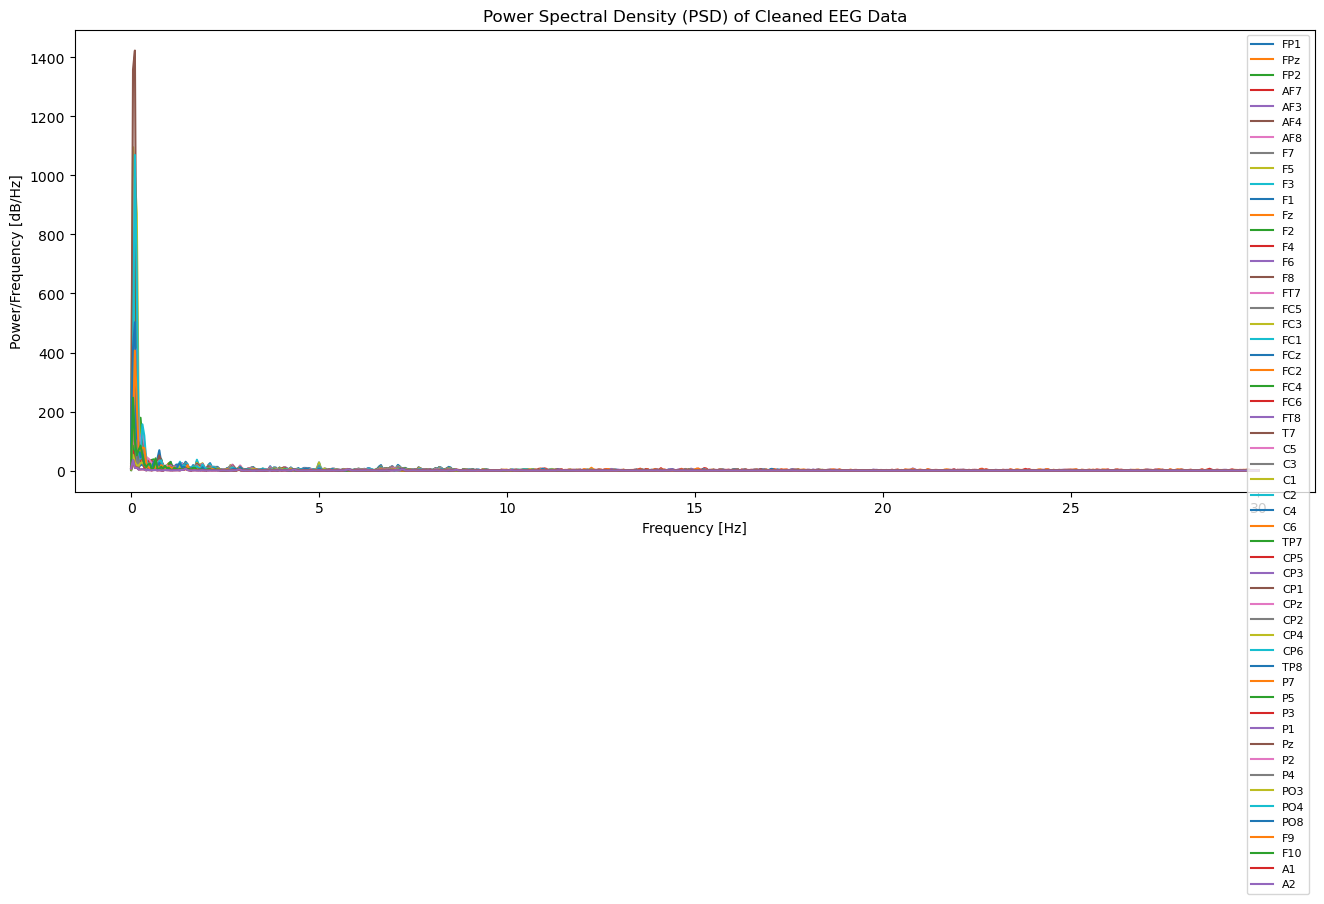

In [52]:
# Plot the all frequency band data (frequency between 0 to 4) from welch PSD using plotly express
# plot_Plotly_Express_PSD(welch_psd_df, 'Power Spectral Density (PSD) of Cleaned EEG Data', {'freq': 'Frequency [Hz]', 'value': 'Power/Frequency [dB/Hz]'})
# Plot the all frequency band data (frequency between 0 to 4) from welch PSD using pyplot
plot_PyPlot_PSD(welch_psd_df, 'Power Spectral Density (PSD) of Cleaned EEG Data', 'Frequency [Hz]', 'Power/Frequency [dB/Hz]')

### Delta Band

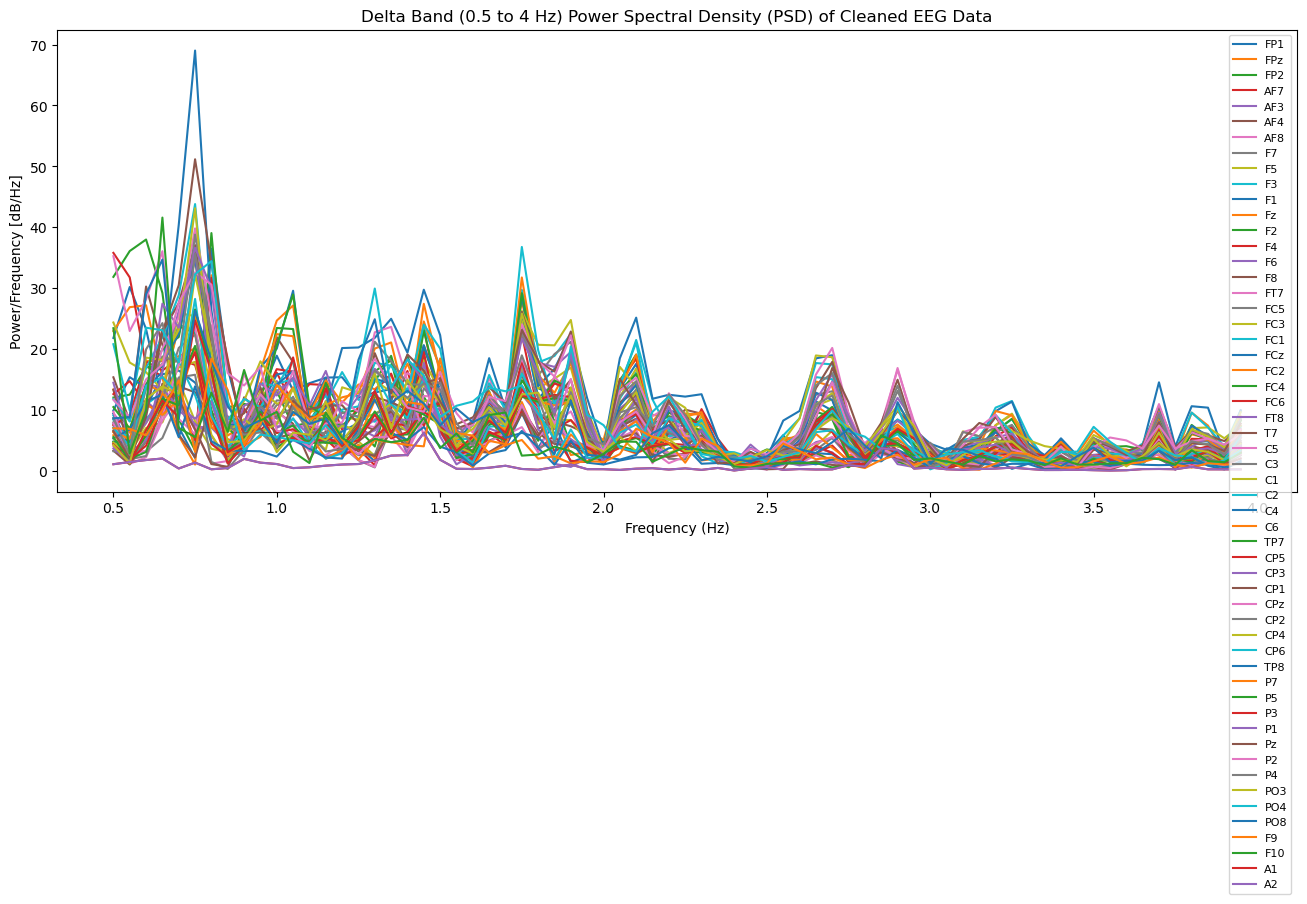

In [53]:
# Plot the delta band data (frequency between 0.5 to 4) from welch PSD using plotly express
# plot_Plotly_Express_PSD(delta_band, 'Delta Band Power Spectral Density (PSD) of Cleaned EEG Data', {'freq': 'Frequency (Hz)', 'value': 'Power/Frequency [dB/Hz]'})

# Plot the delta band data (frequency between 0.5 to 4) from welch PSD using pyplot
plot_PyPlot_PSD(delta_band, 'Delta Band (0.5 to 4 Hz) Power Spectral Density (PSD) of Cleaned EEG Data', 'Frequency (Hz)', 'Power/Frequency [dB/Hz]')

### Theta Band

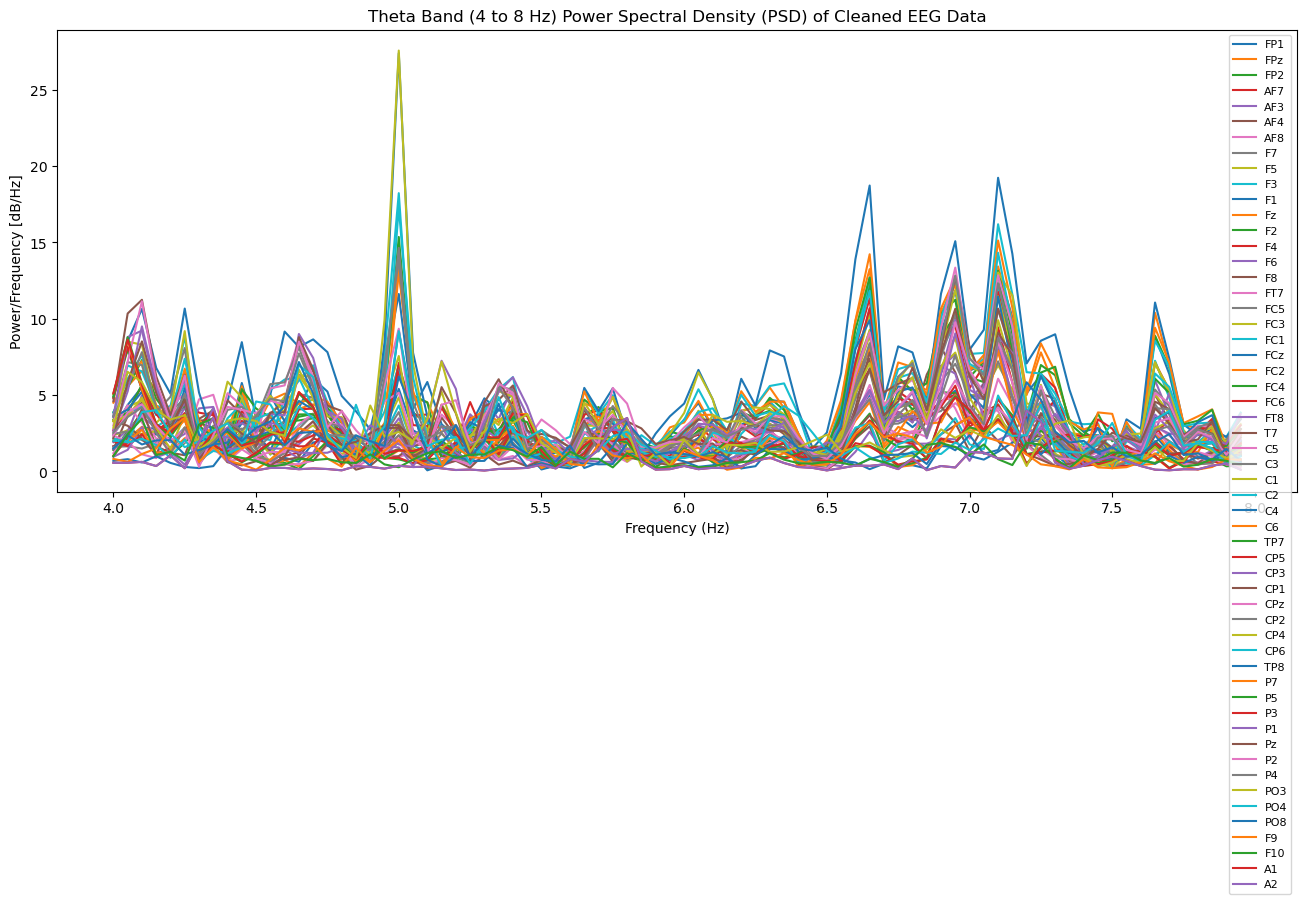

In [54]:
# Plot the theta band data (frequency between 4 to 8) from welch PSD using plotly express
# plot_Plotly_Express_PSD(theta_band, 'Theta Band Power Spectral Density (PSD) of Cleaned EEG Data', {'freq': 'Frequency (Hz)', 'value': 'Power/Frequency [dB/Hz]'})

# Plot the theta band data (frequency between 4 to 8) from welch PSD using pyplot
plot_PyPlot_PSD(theta_band, 'Theta Band (4 to 8 Hz) Power Spectral Density (PSD) of Cleaned EEG Data', 'Frequency (Hz)', 'Power/Frequency [dB/Hz]')

### Alpha Band

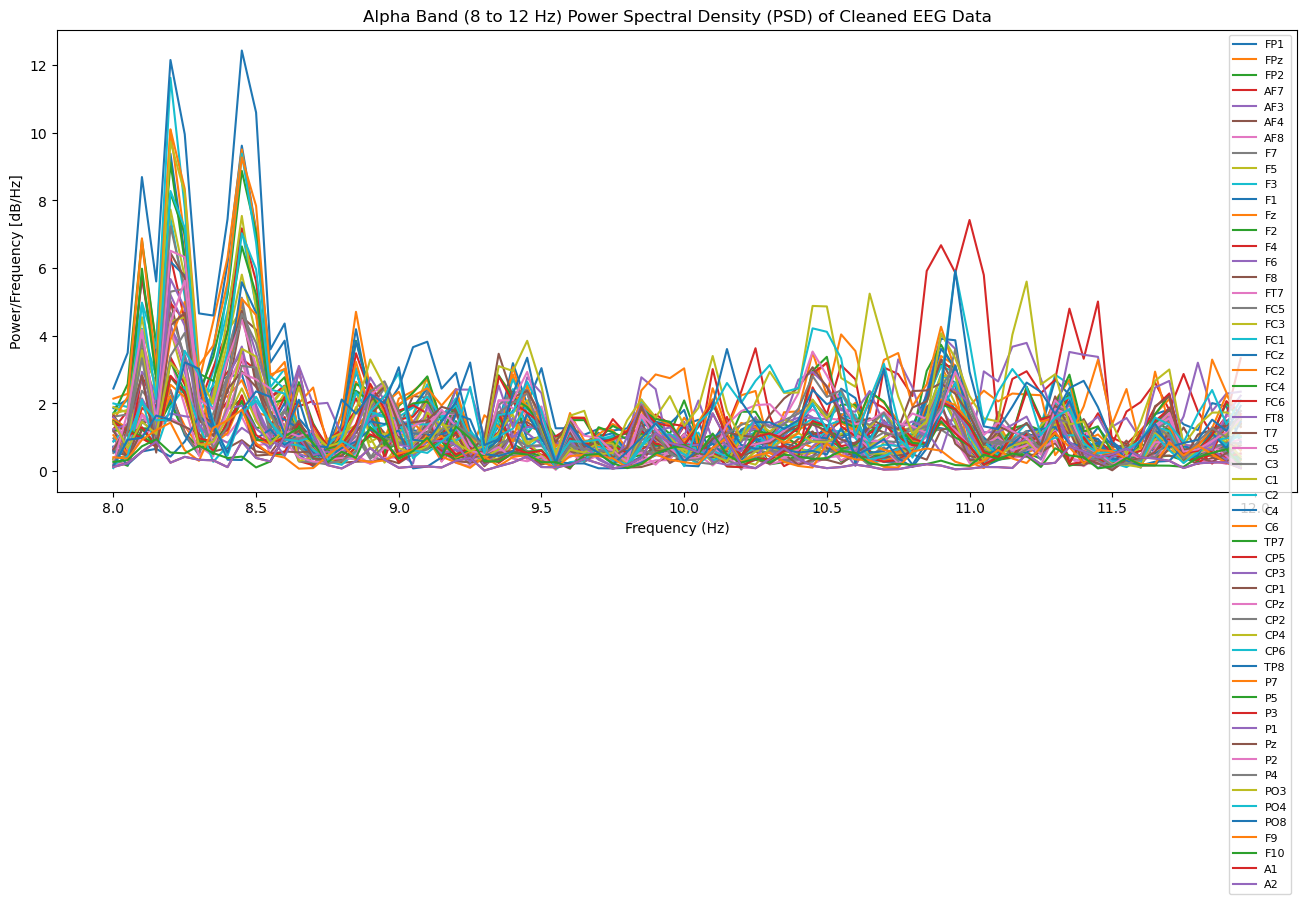

In [55]:
# Plot the alpha band data (frequency between 8 to 12) from welch PSD using plotly express
# plot_Plotly_Express_PSD(alpha_band, 'Alpha Band Power Spectral Density (PSD) of Cleaned EEG Data', {'freq': 'Frequency (Hz)', 'value': 'Power/Frequency [dB/Hz]'})
# Plot the alpha band data (frequency between 8 to 12) from welch PSD using pyplot
plot_PyPlot_PSD(alpha_band, 'Alpha Band (8 to 12 Hz) Power Spectral Density (PSD) of Cleaned EEG Data', 'Frequency (Hz)', 'Power/Frequency [dB/Hz]')

### Beta Band

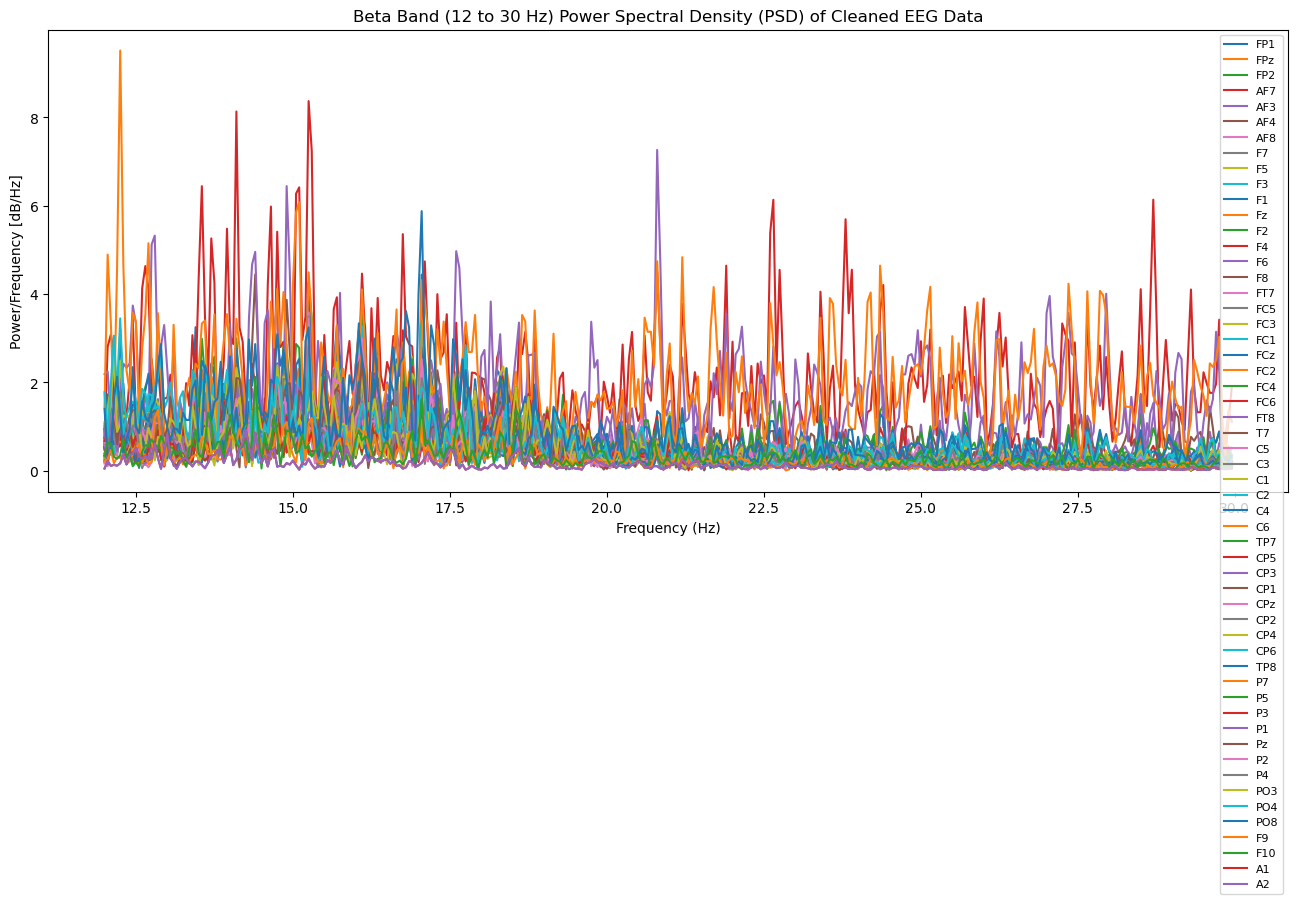

In [56]:
# Plot the beta band data (frequency between 12 to 30) from welch PSD using plotly express
# plot_Plotly_Express_PSD(beta_band, 'Beta Band Power Spectral Density (PSD) of Cleaned EEG Data', {'freq': 'Frequency (Hz)', 'value': 'Power/Frequency [dB/Hz]'})

# Plot the beta band data (frequency between 12 to 30) from welch PSD using pyplot
plot_PyPlot_PSD(beta_band, 'Beta Band (12 to 30 Hz) Power Spectral Density (PSD) of Cleaned EEG Data', 'Frequency (Hz)', 'Power/Frequency [dB/Hz]')

### Gamma Band

In [38]:
# Plot the gamma band data (frequency between > 30) from welch PSD using pyplot
# plot_Plotly_Express_PSD(welch_psd_df, 30, 120, 'Gamma Band Power Spectral Density (PSD) of Cleaned EEG Data', {'freq': 'Frequency (Hz)', 'value': 'Power/Frequency [dB/Hz]'})
# plot_PyPlot_PSD(gamma_band, 'Gamma Band Power Spectral Density (PSD) of Cleaned EEG Data', 'Frequency (Hz)', 'Power/Frequency [dB/Hz]')